In [1]:
import numpy as np
import matplotlib.pyplot as plt

z_0 = sqrt(h^2 m w)
epsilon = E/E0 = E/hw

In [2]:
# Define a function for the Hermit Polynomial
def hermit_poly(n,x):
    if n==0:
        out = np.zeros(x.shape[0])
        out[:] = 1
        return out
    elif n == 1:
        return 2*x
    else:
        return (2*x*hermit_poly(n-1,x) - 2*(n-1)*hermit_poly(n-2,x))

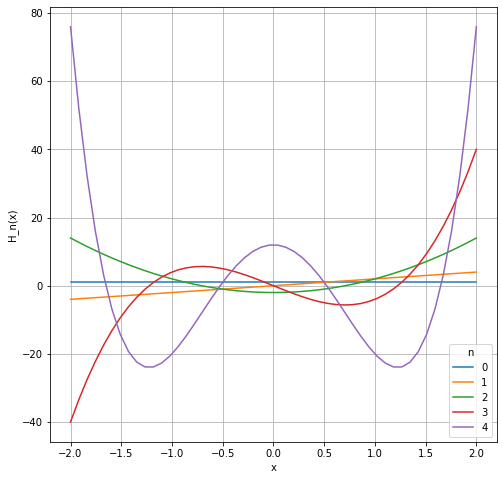

In [3]:
# plot first five hermit polynomials
test_x = np.linspace(-2,2)
f, ax = plt.subplots(1,1, figsize=(8,8))
for n in range(5):
    ax.plot(test_x, hermit_poly(n, test_x), label=n)
    ax.set(xlabel='x', ylabel='H_n(x)')
ax.legend(title='n')
ax.grid()

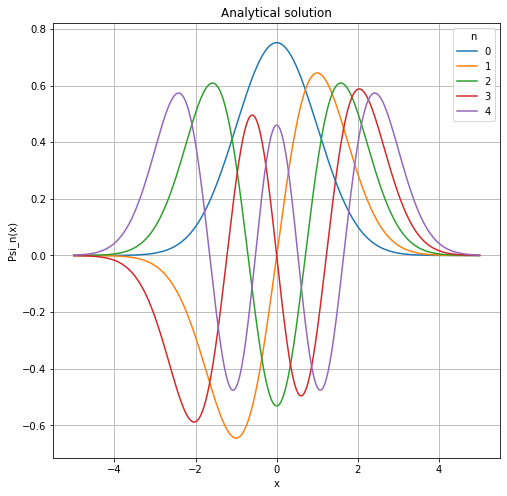

In [4]:
from scipy.special import factorial

# Define function for analytical solution of Psy
def Psy(n,x):
    norm = 2**n * factorial(n) * np.sqrt(np.pi)
    norm = np.sqrt(norm)
    return (hermit_poly(n,x)/norm * np.exp(-x**2/2))

# Plot Psy with the first five hermit polynomials
test_x = np.linspace(-5,5,1000)
f, ax = plt.subplots(1,1, figsize=(8,8))
for n in range(5):
    ax.plot(test_x, Psy(n, test_x), label=n)
    
ax.set(xlabel='x', ylabel='Psi_n(x)', title='Analytical solution')
ax.legend(title = 'n')
ax.grid()

In [5]:
# k(x)

def k_harm0sci(x, epsilon):
    return 2*epsilon - x**2

# Numerov Algorithm
def numerov(x0, y0, y1, k, n_step, h, k_args={}):
    output = np.zeros((n_step+2,2))
    output[0,:] = [x0, y0]
    output[1,:] = [x0+h,y1]
    
    for i in np.arange(2, n_step+2):
        output[i,0] = output[i-1,0] + h
        y_i = (2.-5./6. * k(output[i-1,0], **k_args) * h**2) * output[i-1,1]
        y_i = y_i - (1. + 1./12. * k(output[i-2,0], **k_args) * h**2) * output[i-2, 1]
        y_i = y_i / (1. + 1./12. * k(output[i,0], **k_args) * h**2)
        output[i,1] = y_i
    return output

def numerov_harm0sci(n,xmax,h):
    # setup energy
    epsilon = n+0.5
    
    # Symmetric solutions if n is even
    if n % 2 == 0:
        a = Psy(n, np.array([0]))
        y0 = a
        y1 = y0 - h * h * k_harm0sci(0,epsilon) * y0 * 0.5
    else:
        a = Psy(n, np.array([h]))
        y0 = 0
        y1 = a
        
    # Number of iteration steps
    n_steps = int(x_max/h) - 1
    
    return (numerov(x0=0, y0=y0, y1=y1, k=k_harm0sci, n_step=n_steps, h=h, k_args={'epsilon' : epsilon}))

<ipython-input-5-844ea3d48e0a>:9: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  output[0,:] = [x0, y0]
<ipython-input-5-844ea3d48e0a>:10: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  output[1,:] = [x0+h,y1]
<ipython-input-5-844ea3d48e0a>:10: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([

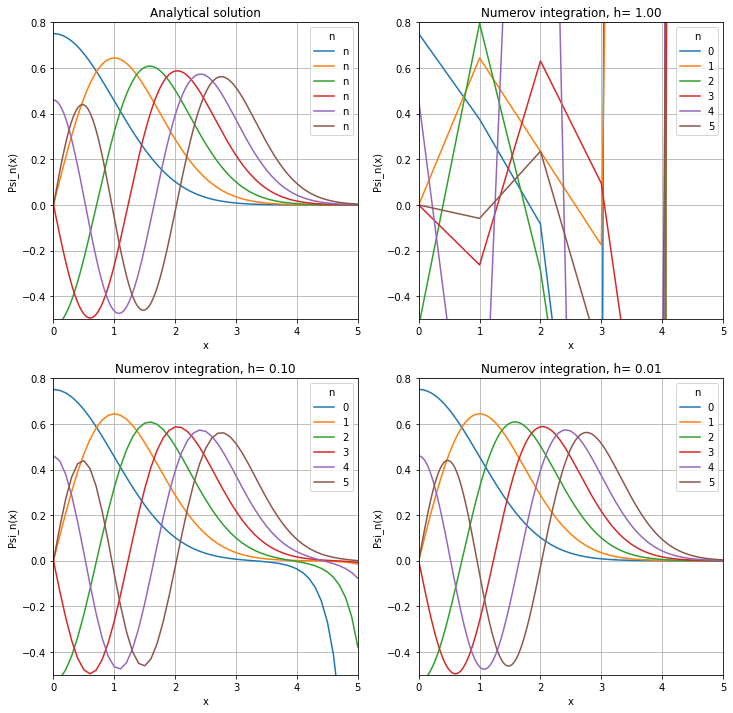

In [6]:
# Apply Numerov integration to Shroedinger eq of harmonic oscillator
h = [1., 0.1, 0.01]
n_i = range(6)
x_max = 5.

# setup plot
f, ax = plt.subplots(2,2,figsize=(12,12))
x_as = np.arange(0, x_max + h[2], h[2])
for n in n_i:
    ax[0,0].plot(x_as, Psy(n, x_as), label='n')
ax[0,0].legend(title='n')
ax[0,0].grid()
ax[0,0].set(xlabel='x', ylabel='Psi_n(x)', title='Analytical solution', xlim=(0,5), ylim=(-0.5, 0.8))

plot_coords = [[0,1], [1,0], [1,1]]
for i in range(len(h)):
    h_i = h[i]
    p = plot_coords[i]
    for n in n_i:
        num = numerov_harm0sci(n=n, xmax= x_max, h = h_i)
        ax[p[0], p[1]].plot(num[:,0], num[:,1], label=n)
    ax[p[0], p[1]].legend(title='n')
    ax[p[0],p[1]].set(xlabel='x', ylabel='Psi_n(x)', title='Numerov integration, h= %.2f' % h_i, xlim=(0,5), ylim=(-0.5, 0.8))
    ax[p[0], p[1]].grid()